## Classification and Natural Language Processing
**Goal 1:** Predict project risk outcome using a Random Forest Classifier model. Which variables appear to be the most important.

**Goal 2:** Predict text patterns using Natural Language Processing.

# Goal 1: Predict project risk outcome using a Random Forest Classifier model

#### Exploratory Data Analysis

In [1]:
# importing libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing dataset
df = (
    pd.read_csv('https://raw.githubusercontent.com/crosstrack10/data-science-projects/main/datasets/dataset_7.csv', sep='\t')
    .sample(frac=1, random_state=42)
)

# chaning pandas setting to display all columns
pd.set_option('display.max_columns', None)

# displaying first five rows
df.head(10)

,Project,Outcome,Duration,Records,Prior1,Prior2,Prior3,Execution,Benefit,Compliance,Authorized,Cost,DATA,DECISIONS,DEPENDENCIES,DESIGN,INTERFACING,Tech_Prob_Defects,ENVIRONMENT,REPORTS,COMMUNICATION,VENDOR,REQUIREMENTS,RESOURCE,PRODUCTIVITY,QUALITY,SCOPE,SECURITY,STAKEHOLDER,SYSTEM,SCHEDULE_SLIPPAGE,USER_READINESS
17,18,0,178,109,1,0,0,1,0,0,0,1,7,0,0,0,0,2,6,3,0,8,0,26,0,0,0,1,0,2,5,0
13,14,1,179,25,0,1,0,1,0,11,0,0,11,0,0,0,0,0,0,0,0,0,0,6,0,1,10,0,0,0,4,0
4,5,1,235,20,0,1,0,1,6,0,0,0,1,0,4,0,0,0,0,0,0,0,0,0,0,3,2,1,1,0,3,0
29,33,1,146,5,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,1,0,0,0,0,0,0,0,0
35,54,0,56,5,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,2,1
25,26,1,199,5,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,4,0,0,0,0,0,0,0,0
6,7,1,170,31,0,1,0,1,0,0,0,0,14,0,0,0,0,14,0,1,0,0,0,5,0,1,1,0,0,1,13,0
26,27,1,103,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0
24,25,1,117,9,0,1,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0
16,17,1,74,18,0,1,0,1,0,0,1,6,0,0,0,0,0,2,0,2,0,0,0,3,0,0,0,0,0,0,6,2


In [3]:
# dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 17 to 28
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Project            37 non-null     int64
 1   Outcome            37 non-null     int64
 2   Duration           37 non-null     int64
 3   Records            37 non-null     int64
 4   Prior1             37 non-null     int64
 5   Prior2             37 non-null     int64
 6   Prior3             37 non-null     int64
 7   Execution          37 non-null     int64
 8   Benefit            37 non-null     int64
 9   Compliance         37 non-null     int64
 10  Authorized         37 non-null     int64
 11  Cost               37 non-null     int64
 12  DATA               37 non-null     int64
 13  DECISIONS          37 non-null     int64
 14  DEPENDENCIES       37 non-null     int64
 15  DESIGN             37 non-null     int64
 16  INTERFACING        37 non-null     int64
 17  Tech_Prob_Defects

In [4]:
# general numerical statistics
df.describe()

,Project,Outcome,Duration,Records,Prior1,Prior2,Prior3,Execution,Benefit,Compliance,Authorized,Cost,DATA,DECISIONS,DEPENDENCIES,DESIGN,INTERFACING,Tech_Prob_Defects,ENVIRONMENT,REPORTS,COMMUNICATION,VENDOR,REQUIREMENTS,RESOURCE,PRODUCTIVITY,QUALITY,SCOPE,SECURITY,STAKEHOLDER,SYSTEM,SCHEDULE_SLIPPAGE,USER_READINESS
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.0,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,21.027027,0.621622,172.540541,38.027027,0.270270,0.702703,0.027027,1.0,0.567568,0.864865,0.783784,0.621622,6.108108,0.756757,0.837838,1.648649,1.405405,5.594595,1.783784,1.135135,0.702703,0.837838,0.405405,5.864865,0.324324,1.648649,2.621622,0.378378,0.810811,2.378378,5.459459,1.351351
std,14.384572,0.491672,111.852978,48.434083,0.450225,0.463373,0.164399,0.0,1.463264,3.163702,2.428250,2.072992,12.001814,2.650004,1.708045,3.310054,2.681826,6.763708,3.808872,2.626385,3.494956,3.077820,1.165701,8.066261,1.972788,3.119973,4.449415,0.861244,2.757191,4.780466,7.897238,2.810854
min,1.000000,0.000000,38.000000,2.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,93.000000,6.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.000000,1.000000,153.000000,19.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
75%,28.000000,1.000000,199.000000,47.000000,1.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.000000,2.000000,2.000000,9.000000,2.000000,2.000000,0.000000,0.000000,0.000000,6.000000,0.000000,2.000000,2.000000,0.000000,0.000000,3.000000,6.000000,2.000000
max,57.000000,1.000000,483.000000,237.000000,1.000000,1.000000,1.000000,1.0,6.000000,16.000000,13.000000,11.000000,65.000000,12.000000,6.000000,13.000000,10.000000,26.000000,19.000000,15.000000,21.000000,17.000000,5.000000,27.000000,12.000000,16.000000,17.000000,4.000000,15.000000,24.000000,35.000000,15.000000


In [5]:
# counting data types
df.dtypes.value_counts()

int64    32
dtype: int64

In [6]:
# counting feature nulls
feat_null_counts = df.isna().sum().sort_values(ascending=False)
feat_null_counts[feat_null_counts > 0]

Series([], dtype: int64)

In [7]:
# counting features with less than 60% zeros
len(df.columns[(df == 0).sum() <= (0.60 * df.shape[1])])

10

In [8]:
# column data types
df.dtypes.index

Index(['Project', 'Outcome', 'Duration', 'Records', 'Prior1', 'Prior2',
       'Prior3', 'Execution', 'Benefit', 'Compliance', 'Authorized', 'Cost',
       'DATA', 'DECISIONS', 'DEPENDENCIES', 'DESIGN', 'INTERFACING',
       'Tech_Prob_Defects', 'ENVIRONMENT', 'REPORTS', 'COMMUNICATION',
       'VENDOR', 'REQUIREMENTS', 'RESOURCE', 'PRODUCTIVITY', 'QUALITY',
       'SCOPE', 'SECURITY', 'STAKEHOLDER', 'SYSTEM', 'SCHEDULE_SLIPPAGE',
       'USER_READINESS'],
      dtype='object')

In [9]:
# dropping unimportant variables from dataframe based on total freight cost target
drop_columns =  df.columns[df.columns.str.contains(pat='prior|project', case=False, regex=True)]
df.drop(drop_columns, axis=1, inplace=True)
df.columns

Index(['Outcome', 'Duration', 'Records', 'Execution', 'Benefit', 'Compliance',
       'Authorized', 'Cost', 'DATA', 'DECISIONS', 'DEPENDENCIES', 'DESIGN',
       'INTERFACING', 'Tech_Prob_Defects', 'ENVIRONMENT', 'REPORTS',
       'COMMUNICATION', 'VENDOR', 'REQUIREMENTS', 'RESOURCE', 'PRODUCTIVITY',
       'QUALITY', 'SCOPE', 'SECURITY', 'STAKEHOLDER', 'SYSTEM',
       'SCHEDULE_SLIPPAGE', 'USER_READINESS'],
      dtype='object')

In [10]:
# storing columns and data types in dictionary
cols_df = pd.DataFrame(df.dtypes, columns=['data_type']).reset_index()
cols_df.rename(columns={'index':'cols'}, inplace=True)

In [11]:
# storing variables
cat_columns = list(cols_df.loc[cols_df.data_type == 'object', 'cols'])
num_columns = list(cols_df.loc[cols_df.data_type != 'object', 'cols'])
num_columns.remove('Outcome')

# printing variable types if present
if len(cat_columns) > 0:
    print('Categorical:', cat_columns, '\n')
elif len(num_columns) > 0:
    print('Numerical:', num_columns)

Numerical: ['Duration', 'Records', 'Execution', 'Benefit', 'Compliance', 'Authorized', 'Cost', 'DATA', 'DECISIONS', 'DEPENDENCIES', 'DESIGN', 'INTERFACING', 'Tech_Prob_Defects', 'ENVIRONMENT', 'REPORTS', 'COMMUNICATION', 'VENDOR', 'REQUIREMENTS', 'RESOURCE', 'PRODUCTIVITY', 'QUALITY', 'SCOPE', 'SECURITY', 'STAKEHOLDER', 'SYSTEM', 'SCHEDULE_SLIPPAGE', 'USER_READINESS']


## Machine Learning Pipeline

In [12]:
# importing scikit-learn packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [13]:
# dividing dataset into features and target
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

# splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [14]:
# checking shapes of train test split
print(
    'X_train: ', X_train.shape, 
    'X_test: ', X_test.shape, 
    'y_train: ', y_train.shape, 
    'X_test: ', y_test.shape, sep="\n"
)

X_train: 
(25, 27)
X_test: 
(12, 27)
y_train: 
(25,)
X_test: 
(12,)


In [15]:
# creating preprocessing objects
simple_imp = SimpleImputer(strategy = "median")
constant_imp = SimpleImputer(strategy = "most_frequent")
ohe = OneHotEncoder(handle_unknown = "ignore")

In [16]:
# creating pipeline for categorical variable transformations
imp_cat = make_pipeline(constant_imp, ohe)

In [17]:
# creating pipeline for numerical variable transformations
imp_num = make_pipeline(simple_imp)

In [18]:
# transforming variables using a column transformer
ct_imputer = make_column_transformer(
    (imp_cat, cat_columns),
    (imp_num, num_columns)
)

In [19]:
# creating an instances of regression models
rfcl = RandomForestClassifier()

In [20]:
# creating a pipelines
rfcl_pipe = make_pipeline(ct_imputer, rfcl)
rfcl_pipe.fit(X_train, y_train);

In [21]:
# importing cross val score function
from sklearn.model_selection import cross_val_score

# creating cross val score function for scikit classification models
def cross_val_score_metrics(model_pipeline, feature_set=X_train, label_vect=y_train, cfolds=5):
    model_name = str(list(model_pipeline.named_steps.values())[1]).replace('()', '')
    list_of_scores = ['accuracy', 'f1', 'precision', 'recall']
    scores_dict = {}
    for metric in [(metric) for metric in list_of_scores]:
        scores_dict[model_name + ' - ' + metric] = round(cross_val_score(model_pipeline, X=feature_set, y=label_vect, cv=cfolds, scoring=metric).mean(), 2)
    return scores_dict

In [22]:
# comparing models
model_list = [rfcl_pipe]

# using custom function on each model and storing results in a dataframe
df_performance = pd.DataFrame(columns=['model_metric', 'scores'])

#storing metric scores
for model in model_list:
    cur_model = cross_val_score_metrics(model)
    performance_keys = pd.Series(cur_model.keys())
    performance_values = pd.Series(cur_model.values())
    series_dict = {'model_metric': performance_keys,
                   'scores': performance_values}
    df_append = pd.concat(series_dict, axis=1)
    df_performance = df_performance.append(df_append)

In [23]:
# displaying results
df_performance

,model_metric,scores
0,RandomForestClassifier - accuracy,0.52
1,RandomForestClassifier - f1,0.69
2,RandomForestClassifier - precision,0.69
3,RandomForestClassifier - recall,0.67


In [24]:
# retrieving named steps in the pipeline
rfcl_pipe.named_steps.keys()

dict_keys(['columntransformer', 'randomforestclassifier'])

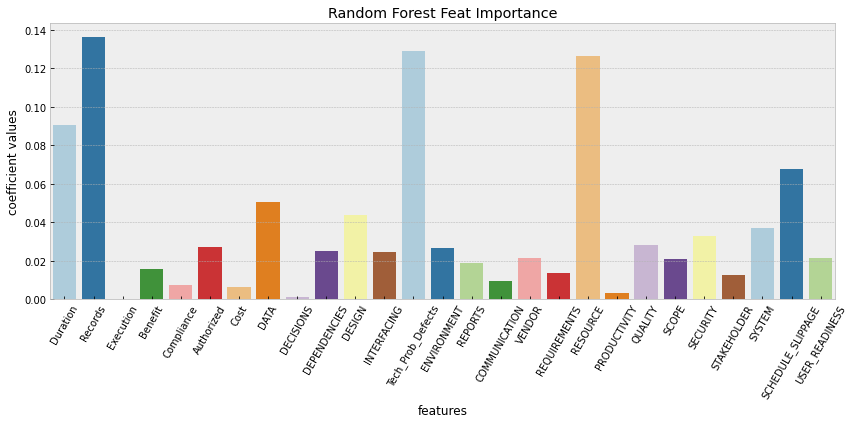

In [25]:
# retrieving impurity based feature importance 
feat_imp = rfcl_pipe.named_steps.randomforestclassifier.feature_importances_

# plotting feature importance
plt.style.use('bmh')
plt.figure(figsize=(12,6))

ax = sns.barplot([x for x in X_train.columns], abs(feat_imp), palette='Paired')
plt.title('Random Forest Feat Importance')
plt.xlabel('features')
plt.ylabel('coefficient values')
plt.xticks(rotation=60)
plt.tight_layout()

In [26]:
# creating dictionary
feat_imp_dict = {
    'Features': X_train.columns,
    'Values': abs(feat_imp)
}

# creating feature dataframe and listing top 10 features
feat_imp_df = pd.DataFrame(feat_imp_dict)
feat_imp_df['Max_Rank'] = feat_imp_df['Values'].rank(method='max', ascending=False)
feat_imp_df.sort_values(by=['Max_Rank']).reset_index(drop=True)[:10]

,Features,Values,Max_Rank
0,Records,0.136531,1.0
1,Tech_Prob_Defects,0.129095,2.0
2,RESOURCE,0.126203,3.0
3,Duration,0.090400,4.0
4,SCHEDULE_SLIPPAGE,0.067558,5.0
5,DATA,0.050647,6.0
6,DESIGN,0.043711,7.0
7,SYSTEM,0.037247,8.0
8,SECURITY,0.033152,9.0
9,QUALITY,0.028359,10.0


The top five variables with the most importance using impurity based coefficients are **records, technical problem defects, resources, duration, schdule slippage.** Aside from records (not sure what it exactly means), the remanining four variables seem actionable. People in an organization can spend more time looking at technical defects to avoid future technical issues. Resouces can be allocated better so projects can succeed. Duration of projects can be adjusted to increase the probability of a successful project. Staying on track with a schdule can lead to positive results.

## Goal 2: Predict text patterns using Natural Language Processing.

In [27]:
# importing TextBlob library for natural language processing
from textblob import TextBlob

In [28]:
# importing dataset
comcast_df = (
    pd.read_csv('https://raw.githubusercontent.com/crosstrack10/data-science-projects/main/datasets/comcast_consumeraffairs_happy2.csv', sep=',', encoding='latin-1')
)

# chaning pandas setting to display all columns
pd.set_option('display.max_columns', None)

# displaying first five rows
comcast_df.head(10)

,Case Num,author,posted_on,rating,Label,Happy_Sat,kancel,Label2,Switch,K_or_S,TermCancel,text
0,1,"Alantae of Chesterfeild, MI","Nov. 22, 2016",1,Dis_Sat,0,0,No_Cancel,1,1,0,I used to love Comcast. Until all these consta...
1,2,"Vera of Philadelphia, PA","Nov. 19, 2016",1,Dis_Sat,0,0,No_Cancel,1,1,0,I'm so over Comcast! The worst internet provid...
2,3,"Sarah of Rancho Cordova, CA","Nov. 17, 2016",1,Dis_Sat,0,0,No_Cancel,0,0,0,If I could give them a negative star or no sta...
3,4,"Dennis of Manchester, NH","Nov. 16, 2016",1,Dis_Sat,0,0,No_Cancel,0,0,0,I've had the worst experiences so far since in...
4,5,"Ryan of Bellevue, WA","Nov. 14, 2016",1,Dis_Sat,0,0,No_Cancel,0,0,0,Check your contract when you sign up for Comca...
5,6,"Terri of Mobile, AL","Nov. 9, 2016",1,Dis_Sat,0,0,No_Cancel,0,0,0,Thank God. I am changing to Dish. They gave me...
6,7,"Kellie of Salt Lake City, UT","Nov. 9, 2016",1,Dis_Sat,0,1,Cancel,0,1,1,I Have been a long time customer and only have...
7,8,"Kathleen of New Haven, CT","Nov. 6, 2016",2,Dis_Sat,0,0,No_Cancel,0,0,0,There is a malfunction on the DVR manager whic...
8,9,"Shira of Bloomfield, NJ","Nov. 5, 2016",1,Dis_Sat,0,0,No_Cancel,0,0,0,Charges overwhelming. Comcast service rep was ...
9,10,"Kristy of Alpharetta, GA","Nov. 2, 2016",1,Dis_Sat,0,0,No_Cancel,1,1,0,"I have had cable, DISH, and U-verse, etc. in t..."


In [29]:
# dataframe info
comcast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4099 entries, 0 to 4098
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Case Num    4099 non-null   int64 
 1   author      4099 non-null   object
 2   posted_on   4099 non-null   object
 3   rating      4099 non-null   int64 
 4   Label       4099 non-null   object
 5   Happy_Sat   4099 non-null   int64 
 6   kancel      4099 non-null   int64 
 7   Label2      4099 non-null   object
 8   Switch      4099 non-null   int64 
 9   K_or_S      4099 non-null   int64 
 10  TermCancel  4099 non-null   int64 
 11  text        4099 non-null   object
dtypes: int64(7), object(5)
memory usage: 384.4+ KB


In [30]:
# top bag of words by frequency
desc_blob = TextBlob(comcast_df.text.str.cat(sep=" "))
top_words_dict = desc_blob.word_counts
top_words_df = pd.DataFrame({'word': top_words_dict.keys(), 'count': top_words_dict.values()})
top_words_df = top_words_df.sort_values(by=['count'], ascending=False).reset_index(drop=True)
top_words_df

,word,count
0,i,39415
1,the,36256
2,to,33505
3,and,27644
4,a,19121
...,...,...
18274,antitrust,1
18275,three-month,1
18276,303.09,1
18277,accidently,1


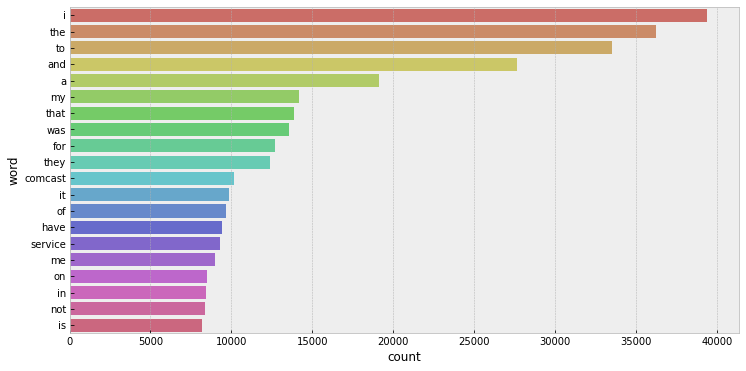

In [31]:
# plotting top 20 words by frequency
plt.figure(figsize=(12,6))
top_20_words_df = top_words_df[:20]
ax = sns.barplot(orient='h', x='count', y='word', data=top_20_words_df, palette='hls')

It is difficult to gather insights using only a single word with no restrictions.

In [32]:
# top noun phrases
top_np_dict = desc_blob.np_counts
top_np_df = pd.DataFrame({'noun_phrases': top_np_dict.keys(), 'count': top_np_dict.values()})
top_np_df = top_np_df.sort_values(by=['count'], ascending=False).reset_index(drop=True)
top_np_df

,noun_phrases,count
0,comcast,9497
1,customer service,972
2,internet,622
3,* *,539
4,ca n't,535
...,...,...
22049,conscious businesses,1
22050,experience service outages,1
22051,dna,1
22052,gathering items,1


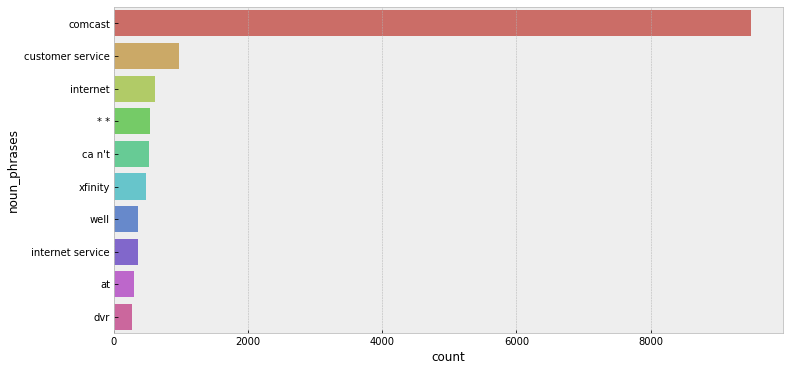

In [33]:
# plotting top 10 words by frequency
plt.figure(figsize=(12,6))
top_10_np_df = top_np_df[:10]
ax = sns.barplot(orient='h', x='count', y='noun_phrases', data=top_10_np_df, palette='hls')

Aside from the word **comcast, customer service, internet, and internet service** are mentioned quite a bit. Could there be an issue with the internet and customer services?

In [34]:
# storing sentences in list of tuples
correct_sentences = desc_blob.sentences

# counting and storing sentences in dict
dict_sentences = {}
for sentence in correct_sentences:
    if sentence in dict_sentences:
        dict_sentences[sentence] += 1
    else:
        dict_sentences[sentence] = 1

In [35]:
# top sentences
top_sentences_df = pd.DataFrame({'sentences': dict_sentences.keys(), 'count': dict_sentences.values()})
top_sentences_df = top_sentences_df.sort_values(by=['count'], ascending=False).reset_index(drop=True)
top_sentences_df

,sentences,count
0,"(R, e, a, l, l, y, ?)",22
1,"(T, h, a, n, k, , y, o, u, .)",19
2,"(W, h, y, ?)",19
3,"(G, u, e, s, s, , w, h, a, t, ?)",12
4,"(W, h, a, t, ?)",12
...,...,...
53653,"(O, n, e, , w, o, r, d, , s, a, y, s, , i, ...",1
53654,"(I, , w, a, s, , o, v, e, r, c, h, a, r, g, ...",1
53655,"(F, i, r, s, t, , o, f, , a, l, l, ,, , w, ...",1
53656,"(Y, o, u, , c, o, u, l, d, , t, e, l, l, , ...",1


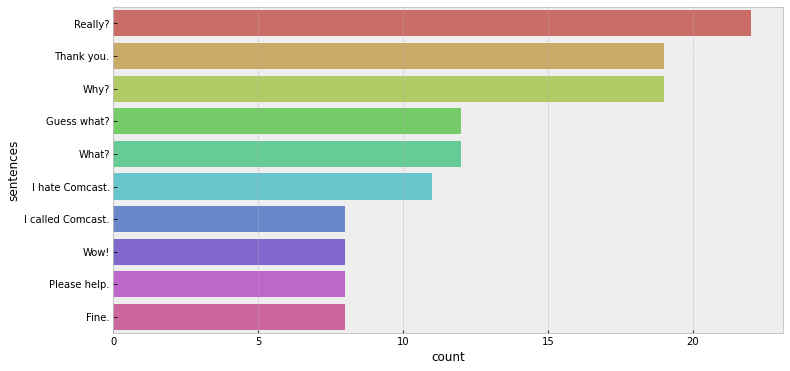

In [36]:
# plotting top 10 sentences by frequency
plt.figure(figsize=(12,6))
top_10_sentences_df = top_sentences_df[:10]
ax = sns.barplot(orient='h', x='count', y='sentences', data=top_10_sentences_df, palette='hls')

Some of these short sentences catch my eye. The "I hate Comcast", "I called Comcast", and "Please help" sentences might lead to potential customer dissatisfaction with the Comcast service. Additional natural language processing techniques can be used to extract additional patterns revealing why some customers are unsatisfied with the company.